In [11]:
import numpy as np
#import network as nx
#import matplotlib as plt
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
states = ["Exploration", "Taking Pictures", "Sampling", "Recharging", "Malfunction/Shut Down"]
transition_matrix = {
    "Exploration": {"Exploration": 0.7, "Taking Pictures": 0.1, "Sampling": 0.1, "Recharging": 0.1},
    "Taking Pictures": {"Exploration": 0.6, "Sampling": 0.4},
    "Sampling": {"Exploration": 0.35, "Recharging": 0.3, "Sampling": 0.3, "Malfunction/Shut Down": 0.05},
    "Recharging": {"Exploration": 1.0},
    "Malfunction/Shut Down": {}
}

In [6]:
rewards = {
    "Exploration": 0,
    "Taking Pictures": 5,
    "Sampling": 20,
    "Recharging": 0,
    "Malfunction/Shut Down": -100
}

# Creating a new graph for MRP
G_mrp = nx.DiGraph()

In [7]:
# Adding states as nodes with rewards
for state, reward in rewards.items():
    G_mrp.add_node(state, reward=reward)

# Adding edges with probabilities as before
for src, transitions in transition_matrix.items():
    for dst, prob in transitions.items():
        G_mrp.add_edge(src, dst, weight=prob)

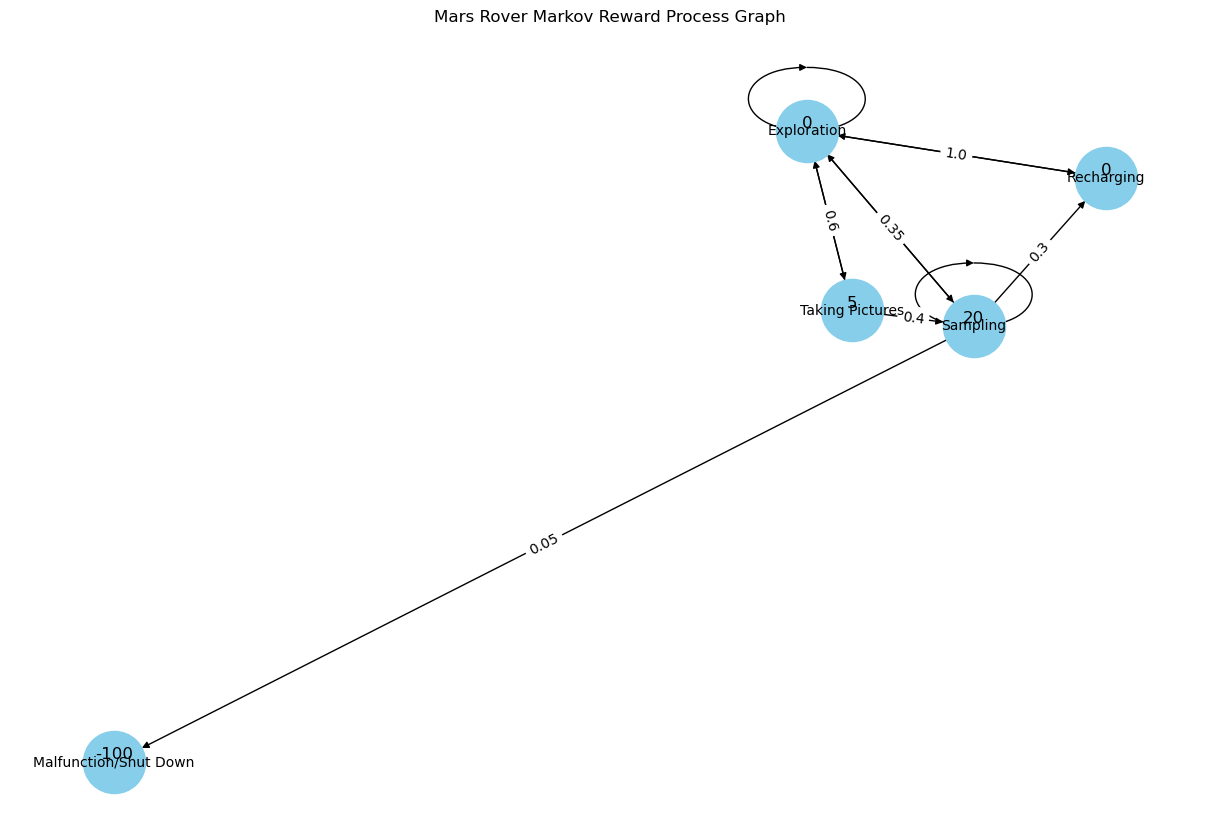

In [12]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_mrp)  # positions for all nodes
nx.draw(G_mrp, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)

# Adding edge labels for probabilities
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G_mrp.edges(data=True)}
nx.draw_networkx_edge_labels(G_mrp, pos, edge_labels=edge_labels, label_pos=0.5)

# Adding node labels for rewards
node_labels = {node: f"{data['reward']}" for node, data in G_mrp.nodes(data=True)}
nx.draw_networkx_labels(G_mrp, pos, labels=node_labels, verticalalignment='bottom')

plt.title("Mars Rover Markov Reward Process Graph")
plt.show()